# 目標：  
任選Cupoy新聞並使用你學習過的爬蟲程式，爬取前  500  篇的文章：  
https://www.cupoy.com/newsfeed/topicgrp/tech_tw  


 
## Target 1  
透過開發者工具觀察網站屬於動態網站，因為下滑滑鼠或按 scroll bar 向下捲頁時，requests 的數量不停增加，由此可知此網頁屬於動態網站。  
<img src="DD.png">
  

## Target 2  
根據網站特性選擇 requests / BeautifulSoup / selenium  

In [11]:
import requests
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
Cupoy_url = "https://www.cupoy.com/newsfeed/topicgrp/business_tw"  #新聞
#使用webdriver.Chrime()建立Google Chrime瀏覽器物件
browser = webdriver.Chrome()
#以get()方法連結到指定網址
browser.get(Cupoy_url)  # 打開瀏覽器並連到Cupoy網頁

SCROLL_PAUSE_TIME = 1

# 以下是用Selenium模擬下拉網頁動作，讓網頁更新
#通過左邊控制橫向和縱向滾動條scrollTo(x, y）
last_height = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
while True:
    time.sleep(1) #是Python程序暫停執行3秒
    # Calculate new scroll height and compare with last scroll height
    new_height = browser.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        print('到達網頁頁面底端')
        break
    print('網頁正在更新中...，請稍後')
    last_height = new_height
#
# 以下是用Selenium模擬下拉網頁動作，讓網頁更新
#
count = 1
total_count = 500
#建立空的串列(list)
updatetimelist = []
categorylist = []
livenesslist = []
titlelist = []
contentlist = []
hreflist = []
while (count <= total_count) :
    html_source = browser.page_source # browser.page_source:網頁原始碼
    soup = BeautifulSoup(html_source, "html5lib")
    
    for artical in soup.find_all('div', class_ = "sc-eEieub sc-iuDHTM emMJDZ"):
        # 文章種類
        category = artical.find('div', class_ = "sc-gacfCG bPSpUf").text
        # 文章標題
        title = artical.find('h6', class_ = 'sc-erNlkL sc-ekulBa gyyrZF').text
        # 文章網址
        href = artical.find("a").get('href')
        # 文章更新時間
        updatetime = artical.find('span').text
        # 防止抓取到重複的文章
        if title not in titlelist:
            # 將各種資料存放進串列中(list)
            updatetimelist.append(updatetime)
            categorylist.append(category)
            titlelist.append(title)
            hreflist.append(href)
            # 計算目前總共已經爬取的文章數量
            count += 1
        # 抓取500篇文章就跳出迴圈
        if count == (total_count + 1):
            break
    
    # 將網頁繼續向下滑
    time.sleep(1) #暫停執行3秒
    browser.execute_script("window.scrollTo(0, 1000000);") # browser.execute_script():滾動到網頁底部
    # 關閉瀏覽器
browser.quit();

網頁正在更新中...，請稍後
到達網頁頁面底端


In [12]:
# 整理資料後顯示
from pandas import DataFrame
columnName = ['category','title','updatetime','href']

data = DataFrame([categorylist, titlelist, updatetimelist, hreflist])
data = data.T
data.columns = columnName
data

,category,title,updatetime,href
0,國際,一國兩制名存實亡》投票恐被扣上「顛覆政權」罪名！林鄭、中聯辦同聲威嚇：民主派初選涉違反「港版...,3 小時前,https://www.storm.mg/article/2850681
1,房地產,臺北仁愛路大廈只要470萬！舊報紙揭30年前房價，網友一看全哭了-風傳媒,4 小時前,https://www.storm.mg/lifestyle/2850816
2,財經,名醫家惡火5死救不回，基層嗆水帶策略錯用害命！高雄消防局火速回應了-風傳媒,4 小時前,https://www.storm.mg/article/2850419
3,理財,60歲就可領退休金？不，要看你是幾年次出生，想提前領還會減給！-風傳媒,6 小時前,https://www.storm.mg/article/2841337
4,Fintech金融科技,用戶數快破900萬人！疫情掀起電子支付熱潮，民眾最愛用這家-風傳媒,6 小時前,https://www.storm.mg/article/2850269
5,職涯,"傳產數位化-不同企業規模下的客製化智慧轉型心法活動日期：2020-07-23 ,投資理財, ...",2020/07/13,https://www.beclass.com/rid=2343ca95ee980e89497b
6,創業,彌補願景基金虧損！軟銀打算賣掉ARM，或在明年內上市｜數位時代,2 小時前,https://www.bnext.com.tw/article/58461/arm-sof...
7,電子商務,微軟將人工智慧服務「小冰」拆分為獨立公司，由沈向洋出任董座｜數位時代,6 小時前,https://www.bnext.com.tw/article/58455/microso...
8,創業,cacaFly宣佈策略投資荔枝智慧，雙方將共推LINE官方帳號新產品｜數位時代,6 小時前,https://www.bnext.com.tw/article/58454/cacafly...
9,足球,AI 翻轉百年產業！英國足球俱樂部搶先用，意外發現這 3 種效益 - Future Comm...,7 小時前,https://fc.bnext.com.tw/ai-football-club/


## TARGET 3
整理理成 pandas.DataFrame 後做簡單的統計可以⽤用 matplotlib.pyplot 或是pandas 內建的 function 畫圖 (histogram / pie chart ...)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
0    21 non-null object
1    21 non-null int64
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes
None


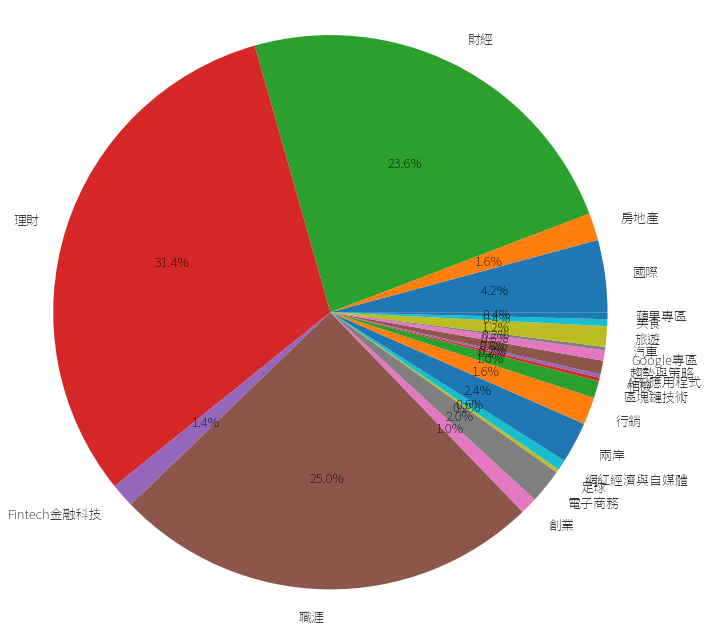

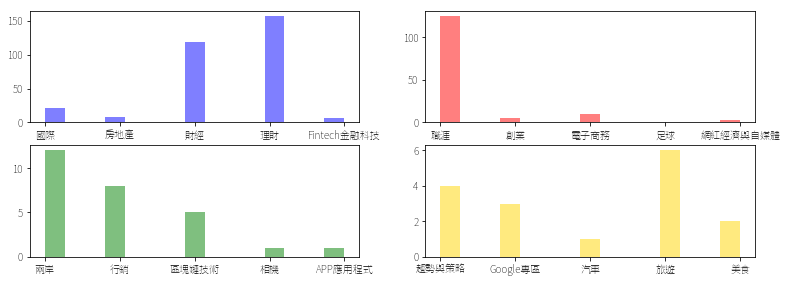

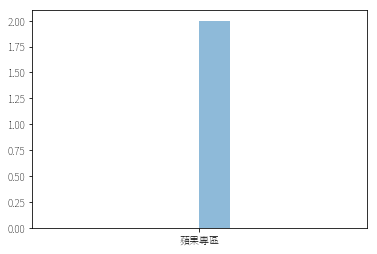

In [13]:
# 用Counter計算種類後排序顯示
from collections import Counter
import matplotlib.pyplot as plt

sourceDict = dict(Counter(categorylist))
categoryDf = DataFrame(list(sourceDict.items()))
print(categoryDf.info())

# 解決圖形的中文顯示問題
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC'] # 替換sans-serif字型
plt.rcParams['axes.unicode_minus'] = False   # 解決座標軸負數的負號顯示問題

# 繪出圓餅圖
plt.figure(figsize=(11,11)) # 顯示圖框架大小
#plt.title('新聞種類分布', fontsize = '25')
labels = categoryDf[0]          # 製作圓餅圖的類別標籤
size = categoryDf[1]            # 製作圓餅圖的數值來源
patches,l_text,p_text = plt.pie(size, labels=labels, autopct = '%1.1f%%')
# 調整字體
for t in l_text:
    t.set_size(13)
for t in p_text:
    t.set_size(13)
plt.axis('equal')
plt.show()

histshow_num = 5
histfigure_num_x = 3
histfigure_num_y = 2
# 繪出長條圖
count = 1
color = ['blue', 'red', 'green', 'gold', 'purple', 
         'orange', 'm', 'teal', 'rosybrown', 'olive', 
         'c', 'navy', 'thistle', 'palegreen', 'pink', 'turquoise'
         'y', 'chocolate', 'grey', 'crimson', 'darkcyan']
plotlist = []
plt.figure(figsize = (13,int(len(categoryDf)/2)-histfigure_num_x))
for key, value in sourceDict.items():
    for i in range(value):
        plotlist.append(key)
    # 每五個種類就畫一張長條圖
    if count % histshow_num == 0:
        plt.subplot(histfigure_num_x, histfigure_num_y, int(count/histshow_num))
        plt.hist(plotlist, alpha=0.5, bins = 15, color=color[int(count/histshow_num-1)])
        plotlist = []
    count += 1
plt.show()
plt.hist(plotlist, alpha=0.5)
plt.show()